## Created Scatter Plot Visualization

In this Jupyter notebook I use the below technologies:
* Python: programming language
* Pandas: an open source data analysis and manipulation tool built on top of the Python programming language.
* NumPy: a package for scientific computing in Python
* Matplotlib: a comprehensive library for creating visualizations in Python.

Contents of this notebook include profiling and transforming the data in `cl_real_happiness.csv` to create a scatter plot graph using Geopandas.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset to use for map visualization
cl_real_happiness = pd.read_csv('./data/cl_real_happiness.csv')

# filter by country and then just picked max price as min/max/mean all the same
cl_real_happiness_price = cl_real_happiness.groupby(by='country')['price_per_sq_meter (city)'].mean()
cl_real_happiness_price = cl_real_happiness_price.reset_index()

# filter by country and then just picked max life expect as min/max/mean all the same
cl_real_happiness_life = cl_real_happiness.groupby(by='country')['Healthy life expectancy (country)'].max()
cl_real_happiness_life = cl_real_happiness_life.reset_index()

# filter by country and then just picked max social support as min/max/mean all the same
cl_real_happiness_social = cl_real_happiness.groupby(by='country')['Social support (country)'].max()
cl_real_happiness_social = cl_real_happiness_social.reset_index()

# merge all three data sets
country_price_life = pd.merge(cl_real_happiness_price, cl_real_happiness_life, how='inner', on='country')
country_price_life_social = pd.merge(country_price_life, cl_real_happiness_social, how='inner', on='country')
# drop NaN and duplicates
country_price_life_social.dropna(inplace=True)
country_price_life_social.drop_duplicates(inplace=True)

print(country_price_life_social.head())

       country  price_per_sq_meter (city)  Healthy life expectancy (country)  \
0  Afghanistan                 486.063333                              52.59   
1      Albania                 887.849000                              68.71   
2      Algeria                 947.055789                              65.91   
5    Argentina                2172.734000                              68.80   
6      Armenia                1518.323333                              66.75   

   Social support (country)  
0                      0.47  
1                      0.67  
2                      0.80  
5                      0.90  
6                      0.76  


In [32]:
print(country_price_life_social.sort_values(by='price_per_sq_meter (city)',ascending=False))



          country  price_per_sq_meter (city)  \
135         Niger              240963.670000   
29        Burundi               24307.240000   
164     Singapore               20752.740000   
65          Gabon               13654.610000   
179   Switzerland               12781.841667   
..            ...                        ...   
74         Guinea                 363.490000   
119    Mauritania                 362.930000   
28   Burkina Faso                 266.020000   
177     Swaziland                 228.110000   
35           Chad                 160.640000   

     Healthy life expectancy (country)  Social support (country)  
135                              53.50                      0.62  
29                               53.40                      0.49  
164                              76.80                      0.91  
65                               59.72                      0.79  
179                              74.10                      0.94  
..                   

10
10
10
10


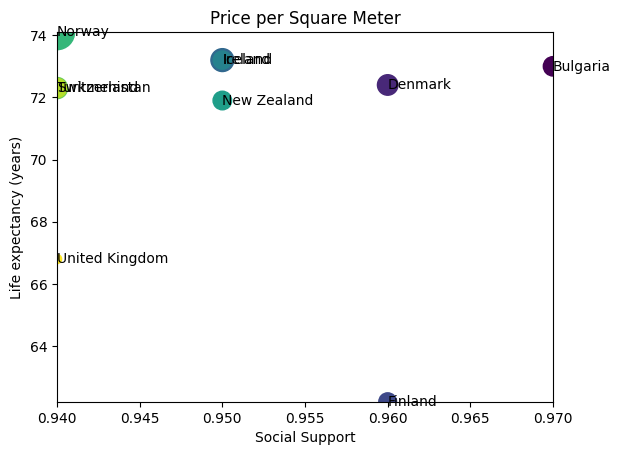

In [39]:

# Convert each into a list in order to use in the scatter plot

countries = list(country_price_life_social['country'].sort_values().unique())
print(len(countries))

price_per = np.array(list(country_price_life_social['price_per_sq_meter (city)']))
print(len(price_per))

life_exp = list(country_price_life_social['Healthy life expectancy (country)'])
print(len(life_exp))

social_supp = list(country_price_life_social['Social support (country)'])
print(len(social_supp))

# Build out the scatter plot for all countries

fig = plt.figure()
ax = fig.add_subplot(111)
# Some random colours: 
colours = range(len(countries))
ax.scatter(social_supp, life_exp, c=colours, s=price_per/20)
ax.set_xlim(min(social_supp), max(social_supp))
ax.set_ylim(min(life_exp), max(life_exp))
ax.set_xlabel('Social Support')
ax.set_ylabel('Life expectancy (years)')

# give the chart a title
plt.title("Price per Square Meter")

offset = 0
for x, y, s, country in zip(social_supp, life_exp, price_per, countries):
    ax.text(x+offset, y, country, va='center')

plt.show()

In [5]:
print(country_price_life_social.sort_values(by='Healthy life expectancy (country)', ascending=False))

          country  price_per_sq_meter (city)  \
164     Singapore               20752.740000   
93          Japan                8040.846800   
173         Spain                2810.926667   
179   Switzerland               12781.841667   
62         France                4983.817975   
..            ...                        ...   
172   South Sudan                4305.560000   
163  Sierra Leone                1076.390000   
136       Nigeria                2704.703750   
91    Ivory Coast                1579.650000   
35           Chad                 160.640000   

     Healthy life expectancy (country)  Social support (country)  
164                              76.80                      0.91  
93                               75.00                      0.88  
173                              74.40                      0.92  
179                              74.10                      0.94  
62                               73.80                      0.94  
..                   

11
11
11
11


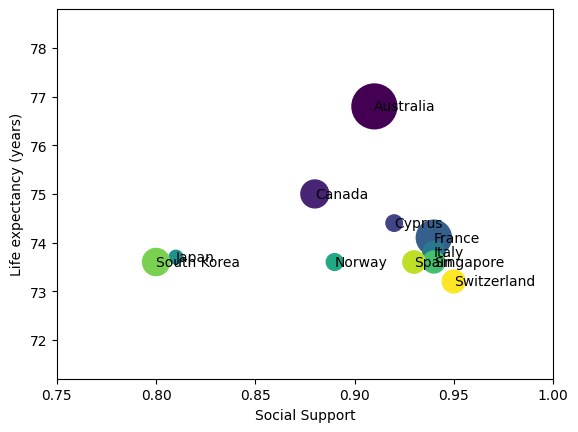

In [17]:
# Convert each column into a list in order to use in the scatter plot

country_price_life_social = country_price_life_social.sort_values(by='Healthy life expectancy (country)', ascending=False)
country_price_life_social = country_price_life_social.iloc[0:10]

countries = list(country_price_life_social['country'].sort_values().unique())
print(len(countries))

price_per = np.array(list(country_price_life_social['price_per_sq_meter (city)']))
print(len(price_per))

life_exp = list(country_price_life_social['Healthy life expectancy (country)'])
print(len(life_exp))

social_supp = list(country_price_life_social['Social support (country)'])
print(len(social_supp))

# Build out scatter plot for top 10 life expectancy countries

fig = plt.figure()
ax = fig.add_subplot(111)
# Some random colours: 
colours = range(len(countries))
ax.scatter(social_supp, life_exp, c=colours, s=price_per/20)
ax.set_xlim(min(social_supp)-.05, max(social_supp)+.05)
ax.set_ylim(min(life_exp)-2, max(life_exp)+2)
ax.set_xlabel('Social Support')
ax.set_ylabel('Life expectancy (years)')

offset = 0
for x, y, s, country in zip(social_supp, life_exp, price_per, countries):
    ax.text(x+offset, y, country, va='center')

plt.show()

In [45]:
continents = pd.read_csv('./data/countries and continents.csv', header=0)

continents = continents[['official_name_en','Continent']]

continents.drop_duplicates(inplace=True)
continents.dropna(inplace=True)

def congo_convert1(value):
  if value == 'Democratic Republic of the Congo':
    value = 'Congo (Kinshasa)'
    return value
  else:
    return value

def congo_convert2(value):
  if value == 'Congo':
    value = 'Congo (Brazzaville)'
    return value
  else:
    return value

def tanzania_convert(value):
  if value == 'United Republic of Tanzania':
    value = 'Tanzania'
    return value
  else:
    return value

continents['official_name_en'] = continents['official_name_en'].map(congo_convert1)

continents['official_name_en'] = continents['official_name_en'].map(congo_convert2)

print(continents[continents['official_name_en'].str.contains('Congo')])

continents['official_name_en'] = continents['official_name_en'].map(tanzania_convert)

print(continents)

    official_name_en Continent
2        Afghanistan        AS
3            Albania        EU
4            Algeria        AF
5     American Samoa        OC
6            Andorra        EU
..               ...       ...
246   Western Sahara        AF
247            Yemen        AS
248           Zambia        AF
249         Zimbabwe        AF
250    Åland Islands        EU

[198 rows x 2 columns]


In [ ]:
country_price_life_social = pd.merge(country_price_life_social, continents, how='outer', on='country')

Would you like to see price per square meter for countries with the highest Life Expectancy or Social Support scores?
10
10
10
10


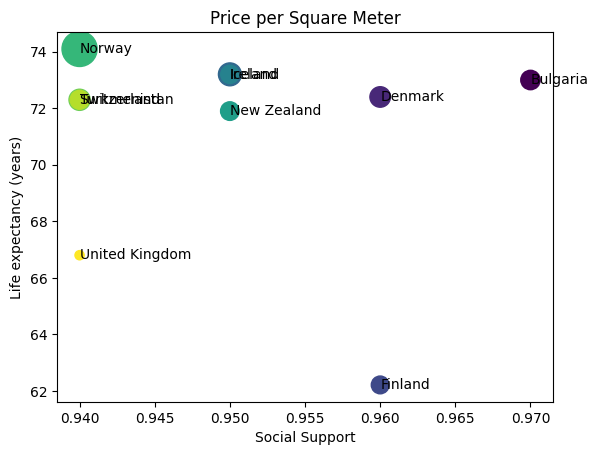

In [40]:
# Convert each column into a list in order to use in the scatter plot
print("Would you like to see price per square meter for countries with the highest Life Expectancy or Social Support scores?")
data_filter = input("Input 'life expectancy' or 'social support'")

if data_filter == 'life expectancy':
    column_filter = 'Healthy life expectancy (country)'
elif data_filter == 'social support':
    column_filter = 'Social support (country)'
else:
    data_filter = input("Please try again and input either 'life expectancy' or 'social support'")

country_price_life_social = country_price_life_social.sort_values(by=column_filter, ascending=False)
country_price_life_social = country_price_life_social.iloc[0:10]

countries = list(country_price_life_social['country'].sort_values().unique())
print(len(countries))

price_per = np.array(list(country_price_life_social['price_per_sq_meter (city)']))
print(len(price_per))

life_exp = list(country_price_life_social['Healthy life expectancy (country)'])
print(len(life_exp))

social_supp = list(country_price_life_social['Social support (country)'])
print(len(social_supp))

# Build out scatter plot for top 10 life expectancy countries

fig = plt.figure()
ax = fig.add_subplot(111)
# Some random colours: 
colours = range(len(countries))
ax.scatter(social_supp, life_exp, c=colours, s=price_per/20)

if column_filter == 'Healthy life expectancy (country)':
    ax.set_xlim(min(social_supp)-.05, max(social_supp)+.05)
    ax.set_ylim(min(life_exp)-2, max(life_exp)+2)
elif column_filter == 'Social Support (country)':
    ax.set_xlim(min(social_supp)-.01, max(social_supp)+.01)
    ax.set_ylim(min(life_exp)-1, max(life_exp)+1)

ax.set_xlabel('Social Support')
ax.set_ylabel('Life expectancy (years)')

plt.title("Price per Square Meter")

offset = 0
for x, y, s, country in zip(social_supp, life_exp, price_per, countries):
    ax.text(x+offset, y, country, va='center')

plt.show()